In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataframe = pd.read_csv("keypoints.csv", header=None)
x = dataframe.drop([0,1,2],axis=1)
y = dataframe[0]

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

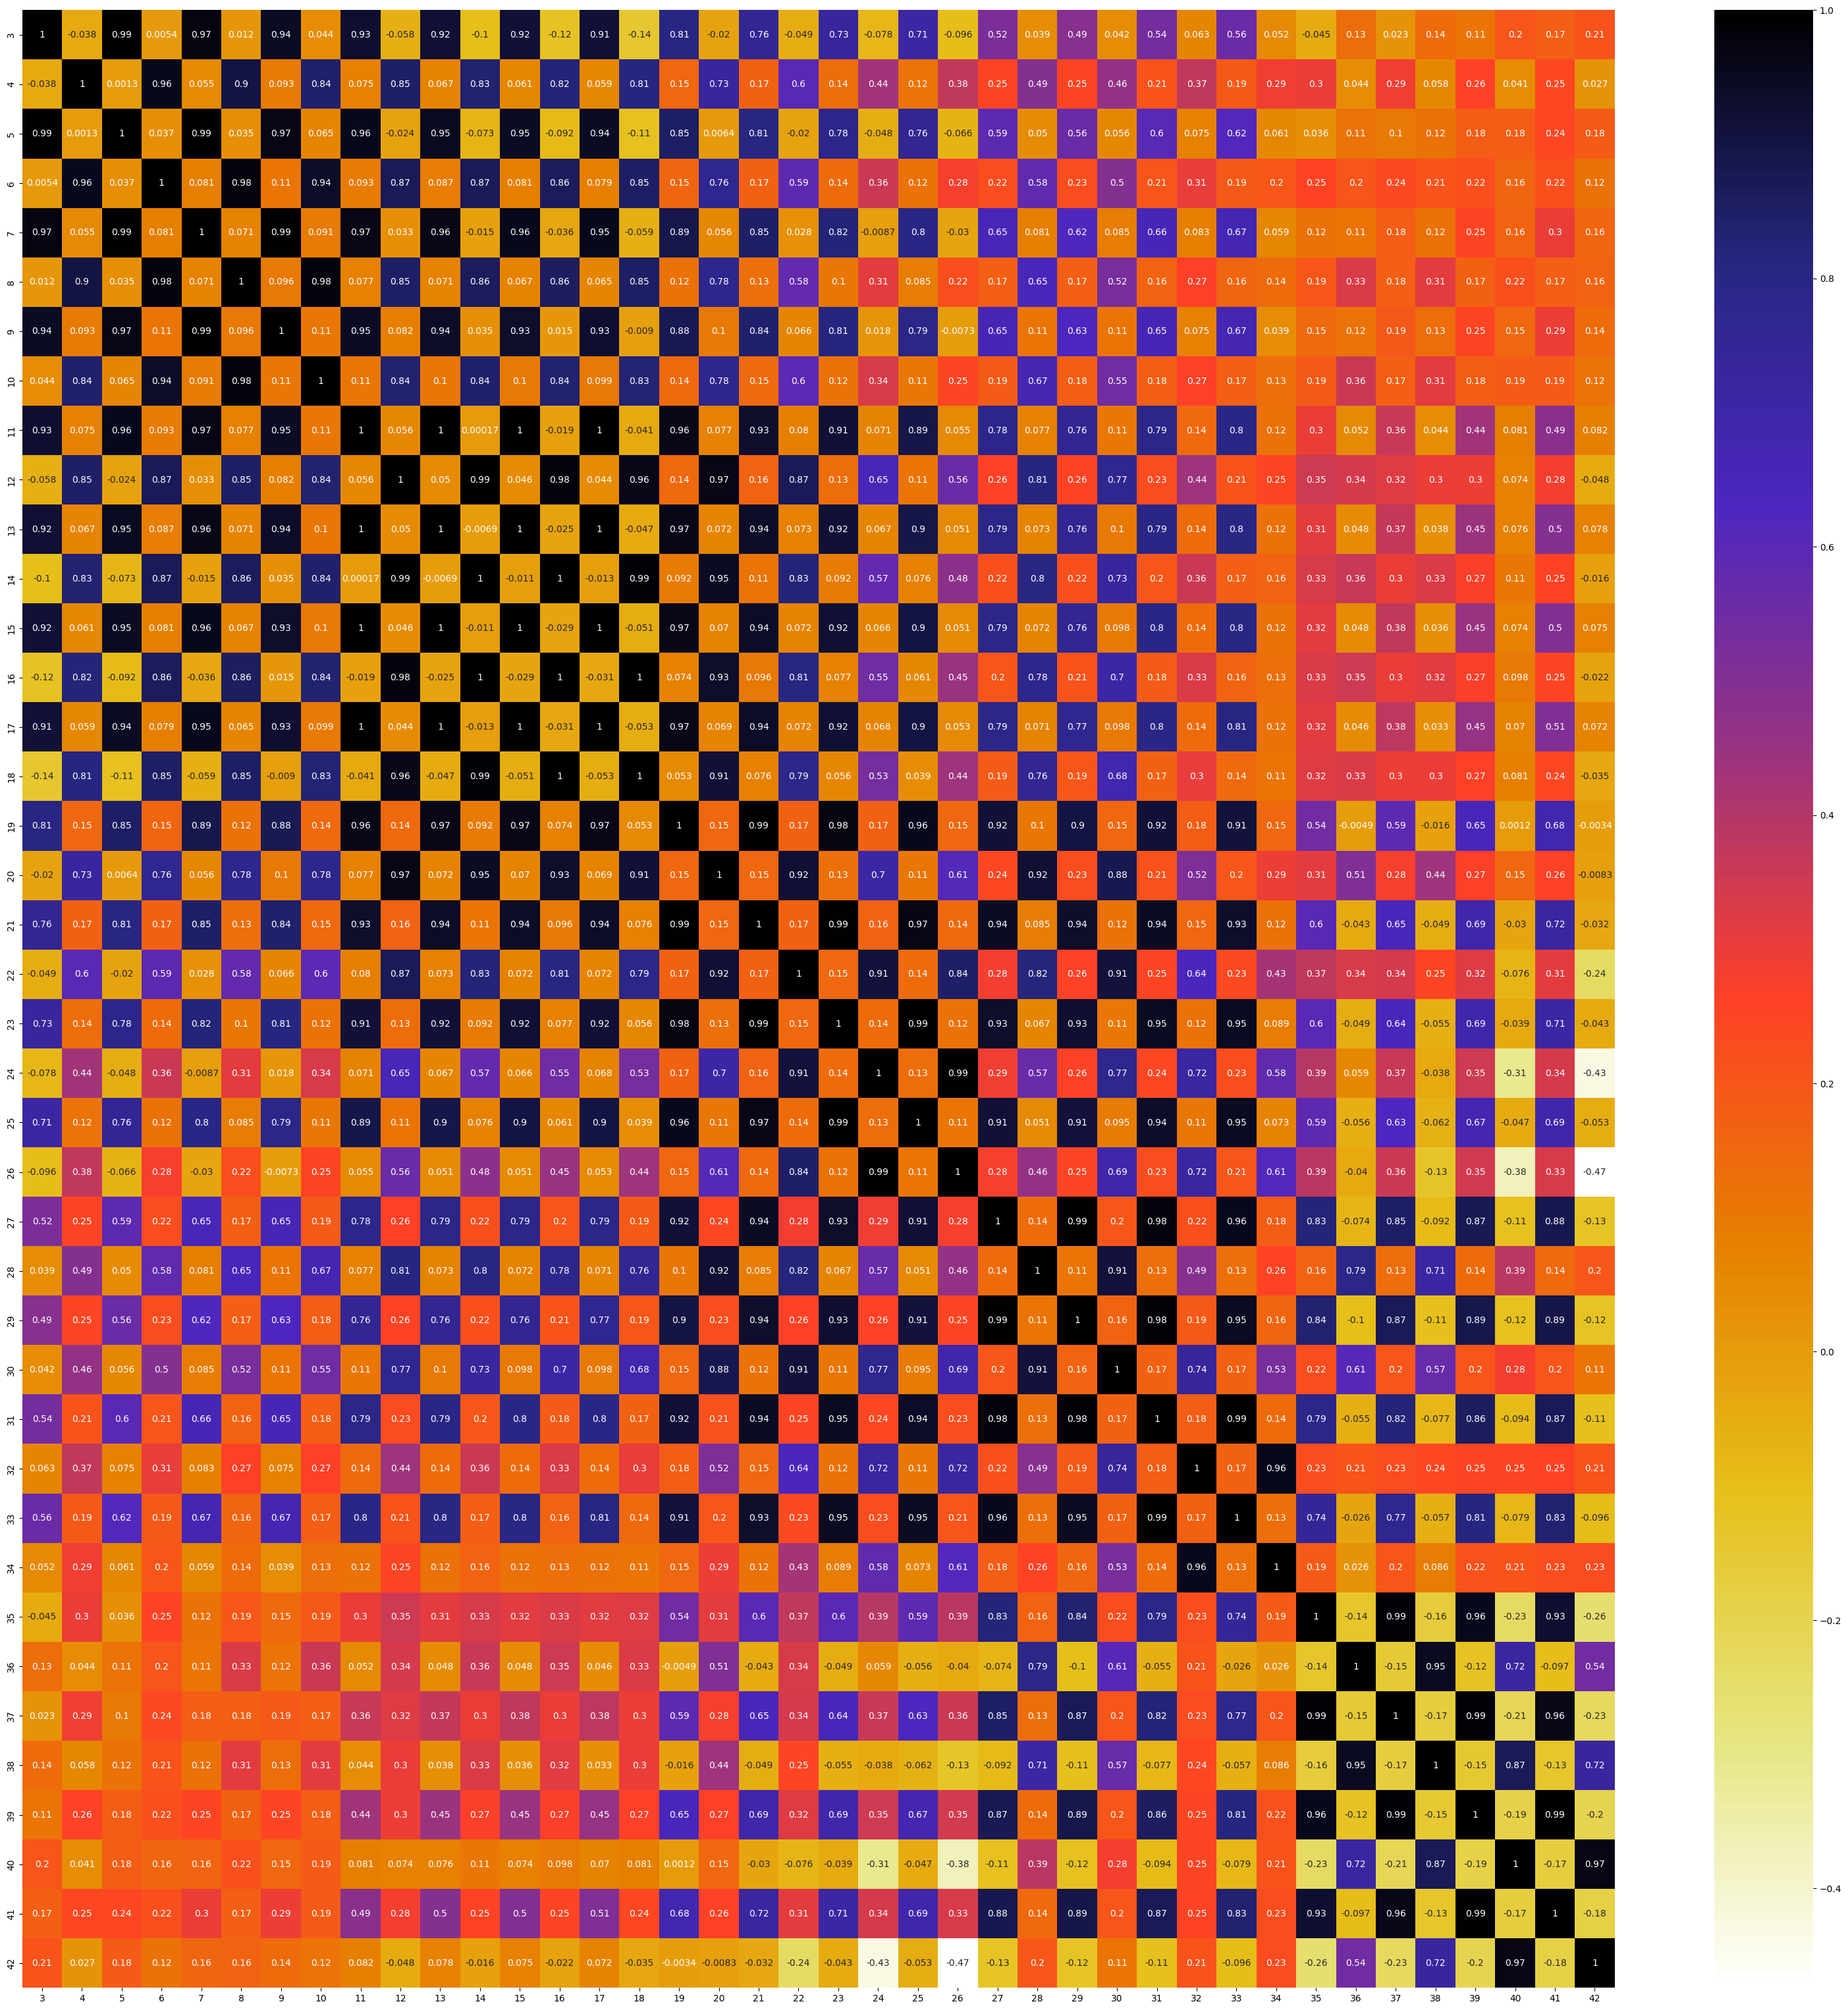

In [11]:
import seaborn as sns
#using pearsons correlation
plt.figure(figsize=(39,39
                    ))
correlation = x_train.corr()
sns.heatmap(correlation,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [6]:
def correlationnn(dataset, threshold):
    col_cor = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_cor.add(colname)
    return col_cor

In [7]:
corr_features = correlationnn(x_train,0.85)
len(set(corr_features))

35

In [16]:
corr_features

{5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 37,
 38,
 39,
 40,
 41,
 42}

In [17]:
x_train = x_train.drop(corr_features, axis=1)
x_test = x_test.drop(corr_features,axis =1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
x_train =sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

classifier = Sequential()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-23 15:51:14.747775: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-23 15:51:14.748048: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
classifier.add(Dense(42,activation='relu',input_shape =(5,)))
classifier.add(Dense(32, activation='relu'))
classifier.add(Dense(3,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 42)                252       
                                                                 
 dense_1 (Dense)             (None, 32)                1376      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,727
Trainable params: 1,727
Non-trainable params: 0
_________________________________________________________________


In [21]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
cp_callback = ModelCheckpoint('models/savedkeypoints.h5',verbose=1,save_weights_only=False)
es_callback =EarlyStopping(patience=20, verbose = 1)

In [22]:
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [24]:
classifier.fit(x_train,y_train,epochs=50, batch_size=32,callbacks=[cp_callback,es_callback],validation_data=(x_test,y_test))

Epoch 1/50
1/5 [=====>........................] - ETA: 0s - loss: 0.7149 - accuracy: 0.8125
Epoch 1: saving model to models/savedkeypoints.h5
5/5 [==============================] - 0s 22ms/step - loss: 0.7268 - accuracy: 0.7838 - val_loss: 0.8268 - val_accuracy: 0.7105
Epoch 2/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6691 - accuracy: 0.8438
Epoch 2: saving model to models/savedkeypoints.h5
5/5 [==============================] - 0s 18ms/step - loss: 0.7073 - accuracy: 0.7905 - val_loss: 0.8067 - val_accuracy: 0.7368
Epoch 3/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6619 - accuracy: 0.7812
Epoch 3: saving model to models/savedkeypoints.h5
5/5 [==============================] - 0s 21ms/step - loss: 0.6891 - accuracy: 0.8108 - val_loss: 0.7900 - val_accuracy: 0.8421
Epoch 4/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6644 - accuracy: 0.8438
Epoch 4: saving model to models/savedkeypoints.h5
5/5 [==============================] - 0s 15ms/s

In [25]:
from keras.models import load_model

model = load_model('models/savedkeypoints.h5')
#making predictions
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis =-1)

2/2 [==============================] - 0s 12ms/step


2022-11-23 17:51:59.207472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [26]:
model.save('models/savedkeypoints.h5')

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  1]
 [ 3  1 10]]


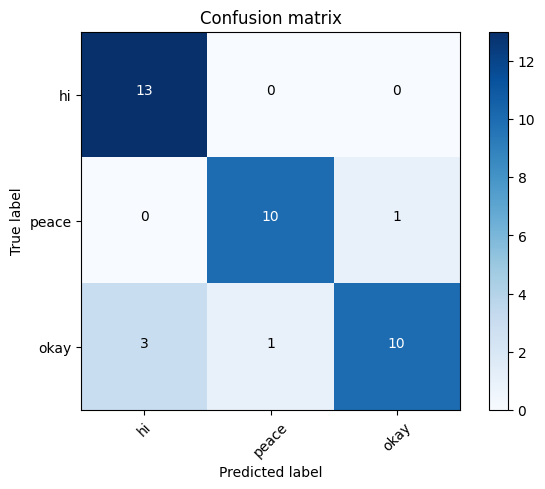

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
import itertools
cm = confusion_matrix(y_test,y_pred)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_name = ['hi','peace', 'okay']
plot_confusion_matrix(cm,classes = class_name)

In [28]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open('models/savedkeypointclassifies.tflite', "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/2n/zdf95zpn6m30n4ykvp3gm_f00000gn/T/tmpkrjws71o/assets


2022-11-23 17:56:54.683093: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-11-23 17:56:54.683109: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-11-23 17:56:54.684939: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/2n/zdf95zpn6m30n4ykvp3gm_f00000gn/T/tmpkrjws71o
2022-11-23 17:56:54.687248: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-11-23 17:56:54.687261: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/2n/zdf95zpn6m30n4ykvp3gm_f00000gn/T/tmpkrjws71o
2022-11-23 17:56:54.690684: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-11-23 17:56:54.691847: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-11-23 17:56:54.730954: I tensorflow/cc/saved_model/loader.

5072

In [29]:
interpreter = tf.lite.Interpreter(model_path = 'models/savedkeypointclassifies.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.set_tensor(input_details[0]['index'],np.array([x_test[0]], dtype = np.float32))


In [30]:
interpreter.invoke()
result = interpreter.get_tensor(output_details[0]['index'])
print(result)

[[1.04350176e-04 9.30737853e-01 6.91578388e-02]]


In [15]:
test_points = [0,0,0,-59,-15,-103,-54,-132,-89,-162,-112,-82,-134,-104,-178,-126,-194,-146,-203,-52,-149,-63,-213,-79,-252,-95,-285,-22,-149,-25,-210,-35,-247,-47,-280,9,-137,19,-183,21,-216,18,-249]
processed_landmark_list = pd.DataFrame([test_points]) 
processed_landmark_list = processed_landmark_list.drop(corr_features, axis = 1)
print(list(processed_landmark_list.values.tolist()))

[[0, 0, 0, -59, -15, -247, 9, -137]]
